In [21]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(".\data\creditcard.csv")

In [4]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [43]:
# Unbalanced dataset
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [45]:
# Why Uppercase X and lowercase y? Lowercase for matrix(features), Uppercase for array(class)
X = data.iloc[:, 0:-1] 
y = data.iloc[:,-1:]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [47]:
def lr(X, y):
    lr = LogisticRegression(random_state=0)
    t_lr = lr.fit(X_train, y_train)
    y_predicted = t_lr.predict(X_test)
    return y_predicted

In [48]:
y_predicted = lr(X, y)
acc = accuracy_score(y_test, y_predicted)
print("Accuracy - unbalanced set: {}".format(acc * 100))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
Accuracy - unbalanced set: 99.90402958697612
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [49]:
confusion_matrix(y_test, y_predicted)

array([[85264,    32],
       [   50,    97]], dtype=int64)

In [13]:
s_data = data.sample(frac=1)
cc_fraud = s_data.loc[s_data.Class==1]
cc_non_fruad = s_data.loc[s_data.Class==0].iloc[:492, :]
balanced_data = pd.concat([cc_fraud, cc_non_fruad])

X_ub = balanced_data.iloc[:, :-1]
y_ub = balanced_data.iloc[:, -1:]

X_train, X_test, y_train, y_test = train_test_split(X_ub, y_ub, test_size=0.3, random_state=0)

In [51]:
y_predicted = lr(X_ub, y_ub)
acc = accuracy_score(y_test, y_predicted)
print("Accuracy - balanced set: {}".format(acc * 100))

Accuracy - balanced set: 94.25675675675676
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [52]:
confusion_matrix(y_test, y_predicted)

array([[144,   5],
       [ 12, 135]], dtype=int64)

In [53]:
os = SMOTE()
X_os, y_os = os.fit_resample(X, y)

In [54]:
print("Before oversampling: {}, After oversampling: {}".format(X.shape, X_ob.shape))

Before oversampling: (284807, 30), After oversampling: (568630, 30)


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_os, y_os, test_size=0.3, random_state=0)

y_predicted = lr(X_train, y_train)
acc = accuracy_score(y_test, y_predicted)
print("Accuracy - balanced set: {}".format(acc * 100))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
Accuracy - balanced set: 97.18797812285669


In [56]:
confusion_matrix(y_test, y_predicted)

array([[83433,  1739],
       [ 3058, 82359]], dtype=int64)

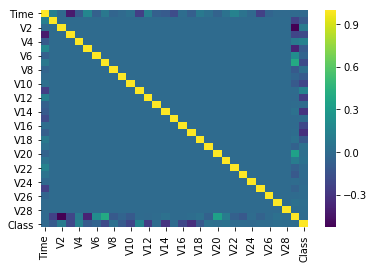

In [11]:
corr = data.corr()
sns.heatmap(corr, cmap="viridis")

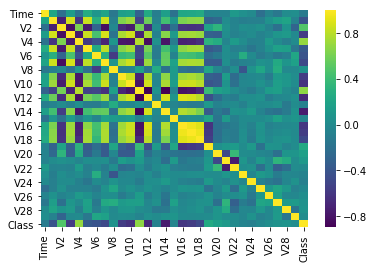

In [14]:
corr = balanced_data.corr()
sns.heatmap(corr, cmap="viridis")

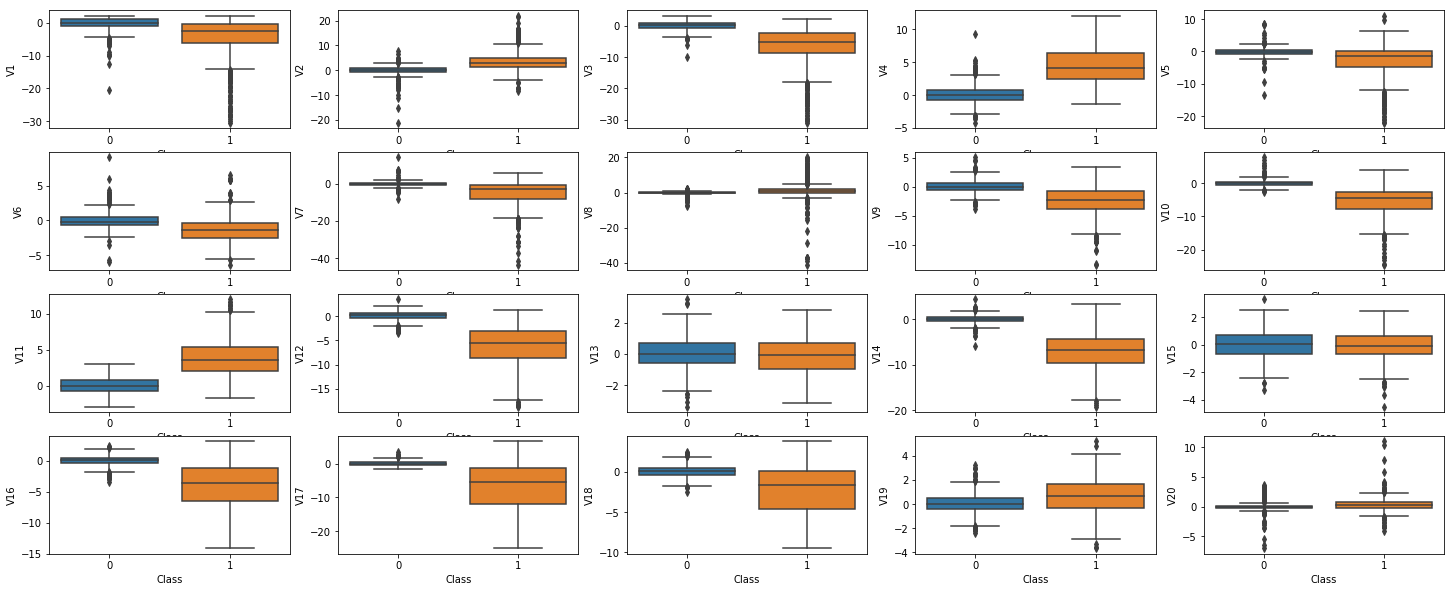

In [40]:
f, axes = plt.subplots(nrows=4,  ncols=5, figsize=(25, 10))

sns.boxplot(x="Class", y="V1", data=balanced_data, ax=axes[0, 0])
sns.boxplot(x="Class", y="V2", data=balanced_data, ax=axes[0, 1])
sns.boxplot(x="Class", y="V3", data=balanced_data, ax=axes[0, 2])
sns.boxplot(x="Class", y="V4", data=balanced_data, ax=axes[0, 3])
sns.boxplot(x="Class", y="V5", data=balanced_data, ax=axes[0, 4])

sns.boxplot(x="Class", y="V6", data=balanced_data, ax=axes[1, 0])
sns.boxplot(x="Class", y="V7", data=balanced_data, ax=axes[1, 1])
sns.boxplot(x="Class", y="V8", data=balanced_data, ax=axes[1, 2])
sns.boxplot(x="Class", y="V9", data=balanced_data, ax=axes[1, 3])
sns.boxplot(x="Class", y="V10", data=balanced_data, ax=axes[1, 4])

sns.boxplot(x="Class", y="V11", data=balanced_data, ax=axes[2, 0])
sns.boxplot(x="Class", y="V12", data=balanced_data, ax=axes[2, 1])
sns.boxplot(x="Class", y="V13", data=balanced_data, ax=axes[2, 2])
sns.boxplot(x="Class", y="V14", data=balanced_data, ax=axes[2, 3])
sns.boxplot(x="Class", y="V15", data=balanced_data, ax=axes[2, 4])

sns.boxplot(x="Class", y="V16", data=balanced_data, ax=axes[3, 0])
sns.boxplot(x="Class", y="V17", data=balanced_data, ax=axes[3, 1])
sns.boxplot(x="Class", y="V18", data=balanced_data, ax=axes[3, 2])
sns.boxplot(x="Class", y="V19", data=balanced_data, ax=axes[3, 3])
sns.boxplot(x="Class", y="V20", data=balanced_data, ax=axes[3, 4])

